In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               150000 non-null  int64 
 1   STATE            150000 non-null  object
 2   AGE              150000 non-null  int64 
 3   OCCUPATION       150000 non-null  object
 4   INCOME_GROUP     150000 non-null  object
 5   CUSTOMER_SINCE   150000 non-null  int64 
 6   LOYALTY_PROGRAM  132176 non-null  object
 7   PAST_PURCHASE    150000 non-null  int64 
 8   PURCHASE         150000 non-null  object
dtypes: int64(4), object(5)
memory usage: 10.3+ MB


In [5]:
df.isna().sum()

ID                     0
STATE                  0
AGE                    0
OCCUPATION             0
INCOME_GROUP           0
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

In [6]:
df.describe()

,ID,AGE,CUSTOMER_SINCE,PAST_PURCHASE
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,43.805660,2015.507960,11244.207287
std,43301.414527,14.828219,2.685645,8458.166886
min,1.000000,23.000000,2008.000000,208.000000
25%,37500.750000,30.000000,2013.000000,6034.750000
50%,75000.500000,43.000000,2017.000000,8926.000000
75%,112500.250000,54.000000,2018.000000,13636.000000
max,150000.000000,85.000000,2019.000000,103520.000000


In [7]:
df['LOYALTY_PROGRAM'].value_counts()

No     88182
Yes    43994
Name: LOYALTY_PROGRAM, dtype: int64

In [8]:
df['OCCUPATION'].value_counts()

Self employed    61375
Salaried         44214
                 42777
Business          1634
Name: OCCUPATION, dtype: int64

In [9]:


# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df[['PAST_PURCHASE']])

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [10]:
df_normalized.columns = ['PAST_PURCHASE_Normalised']

In [11]:
df_sc1 = pd.concat([df, df_normalized], axis=1)

In [12]:
df_sc1=df_sc1.drop(['PAST_PURCHASE'], axis=1)

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled1 = min_max_scaler.fit_transform(df[['AGE']])

# Run the normalizer on the dataframe
df_normalized1 = pd.DataFrame(x_scaled1)

In [14]:
df_normalized1.columns = ['AGE_Normalised']
df_sc11 = pd.concat([df_sc1, df_normalized1], axis=1)
df_sc11=df_sc11.drop(['AGE'], axis=1)

In [15]:
df_sc11.head()

,ID,STATE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PURCHASE,PAST_PURCHASE_Normalised,AGE_Normalised
0,1,Uttar Pradesh,,Low,2018,No,No,0.045774,0.080645
1,2,Madhya Pradesh,Salaried,Low,2018,No,No,0.102853,0.064516
2,3,West Bengal,,High,2013,NaN,Yes,0.081326,0.629032
3,4,Tamil Nadu,Salaried,Low,2018,No,Yes,0.137119,0.064516
4,5,Uttar Pradesh,Self employed,High,2015,No,No,0.125348,0.274194


In [16]:
df_sc11.loc[:, "CUSTOMER_SINCE"] = df["CUSTOMER_SINCE"].apply(lambda x:2021-x)

In [17]:
df_sc11

,ID,STATE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PURCHASE,PAST_PURCHASE_Normalised,AGE_Normalised
0,1,Uttar Pradesh,,Low,3,No,No,0.045774,0.080645
1,2,Madhya Pradesh,Salaried,Low,3,No,No,0.102853,0.064516
2,3,West Bengal,,High,8,NaN,Yes,0.081326,0.629032
3,4,Tamil Nadu,Salaried,Low,3,No,Yes,0.137119,0.064516
4,5,Uttar Pradesh,Self employed,High,6,No,No,0.125348,0.274194
...,...,...,...,...,...,...,...,...,...
149995,149996,Assam,Salaried,Low,4,No,No,0.058396,0.096774
149996,149997,Andhra Pradesh,Self employed,Medium,11,No,No,0.283016,0.483871
149997,149998,Odisha,,Low,3,No,No,0.044990,0.129032
149998,149999,Andhra Pradesh,Self employed,High,11,Yes,Yes,0.095081,0.500000


In [18]:
df_sc11['PURCHASE'].isna().sum()

0

In [19]:
#df_sc11.loc[:, "PURCHASE"] = df["PURCHASE"].apply({'No':0,'Yes':1})
df_sc11["PURCHASE"] = pd.get_dummies(df_sc11["PURCHASE"])

In [20]:
df_sc11["PURCHASE"]

0         1
1         1
2         0
3         0
4         1
         ..
149995    1
149996    1
149997    1
149998    0
149999    0
Name: PURCHASE, Length: 150000, dtype: uint8

In [21]:
df_sc11.tail()

,ID,STATE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PURCHASE,PAST_PURCHASE_Normalised,AGE_Normalised
149995,149996,Assam,Salaried,Low,4,No,1,0.058396,0.096774
149996,149997,Andhra Pradesh,Self employed,Medium,11,No,1,0.283016,0.483871
149997,149998,Odisha,,Low,3,No,1,0.044990,0.129032
149998,149999,Andhra Pradesh,Self employed,High,11,Yes,0,0.095081,0.500000
149999,150000,Maharashtra,,Medium,8,NaN,0,0.073109,0.596774


In [22]:
df_sc11['INCOME_GROUP'].value_counts()

Low       63523
High      41808
Medium    41232
           3437
Name: INCOME_GROUP, dtype: int64

In [23]:
cleanup_nums = {"INCOME_GROUP": {"Low": 0, "High": 2, "Medium": 1, " ": 3}}
df_sc11 = df_sc11.replace(cleanup_nums)


In [24]:
df_sc11['INCOME_GROUP'].value_counts()

0    63523
2    41808
1    41232
3     3437
Name: INCOME_GROUP, dtype: int64

In [25]:
cleanup_nums = {"OCCUPATION": {"Salaried": 3, "Self employed": 1, "Business": 2, " ": 0}}
df_sc11 = df_sc11.replace(cleanup_nums)

In [26]:
df_sc11

,ID,STATE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PURCHASE,PAST_PURCHASE_Normalised,AGE_Normalised
0,1,Uttar Pradesh,0,0,3,No,1,0.045774,0.080645
1,2,Madhya Pradesh,3,0,3,No,1,0.102853,0.064516
2,3,West Bengal,0,2,8,NaN,0,0.081326,0.629032
3,4,Tamil Nadu,3,0,3,No,0,0.137119,0.064516
4,5,Uttar Pradesh,1,2,6,No,1,0.125348,0.274194
...,...,...,...,...,...,...,...,...,...
149995,149996,Assam,3,0,4,No,1,0.058396,0.096774
149996,149997,Andhra Pradesh,1,1,11,No,1,0.283016,0.483871
149997,149998,Odisha,0,0,3,No,1,0.044990,0.129032
149998,149999,Andhra Pradesh,1,2,11,Yes,0,0.095081,0.500000


In [27]:
df_sc11['LOYALTY_PROGRAM'].value_counts()

No     88182
Yes    43994
Name: LOYALTY_PROGRAM, dtype: int64

In [28]:
df_sc11

,ID,STATE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PURCHASE,PAST_PURCHASE_Normalised,AGE_Normalised
0,1,Uttar Pradesh,0,0,3,No,1,0.045774,0.080645
1,2,Madhya Pradesh,3,0,3,No,1,0.102853,0.064516
2,3,West Bengal,0,2,8,NaN,0,0.081326,0.629032
3,4,Tamil Nadu,3,0,3,No,0,0.137119,0.064516
4,5,Uttar Pradesh,1,2,6,No,1,0.125348,0.274194
...,...,...,...,...,...,...,...,...,...
149995,149996,Assam,3,0,4,No,1,0.058396,0.096774
149996,149997,Andhra Pradesh,1,1,11,No,1,0.283016,0.483871
149997,149998,Odisha,0,0,3,No,1,0.044990,0.129032
149998,149999,Andhra Pradesh,1,2,11,Yes,0,0.095081,0.500000


In [29]:
cleanup_nums = {"LOYALTY_PROGRAM": {"No": 0, "Yes": 1}}
df_sc11 = df_sc11.replace(cleanup_nums)

In [30]:
df_sc11=df_sc11.dropna()

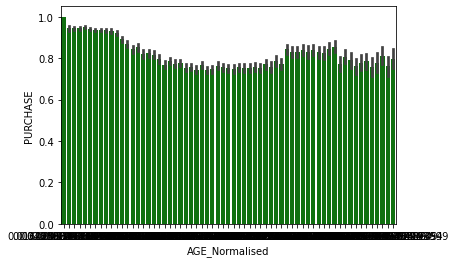

In [31]:
sns.barplot(data=df_sc11, x='AGE_Normalised', y='PURCHASE', color='g')
plt.show()

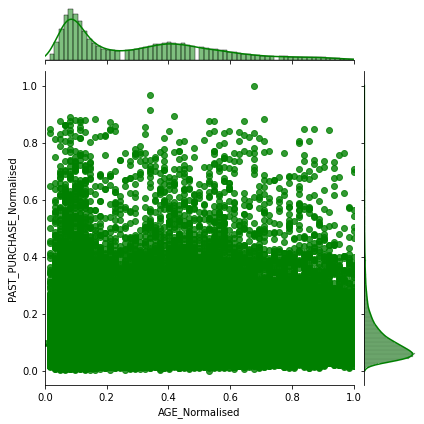

In [32]:
sns.jointplot(data=df_sc11, x='AGE_Normalised', y='PAST_PURCHASE_Normalised', kind='reg', color='g')
plt.show()

In [33]:
df_sc11.loc[:, "AGE_Normalised"] = df_sc11["AGE_Normalised"].apply(lambda x:1-x)

In [34]:
feature_cols = ['OCCUPATION', 'INCOME_GROUP', 'CUSTOMER_SINCE', 'LOYALTY_PROGRAM','PAST_PURCHASE_Normalised','AGE_Normalised']
x = df_sc11[feature_cols] # Features

y= df_sc11.PURCHASE

In [35]:




from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)










[[ 2291  4428]
 [ 4711 32189]]
              precision    recall  f1-score   support

           0       0.33      0.34      0.33      6719
           1       0.88      0.87      0.88     36900

    accuracy                           0.79     43619
   macro avg       0.60      0.61      0.60     43619
weighted avg       0.79      0.79      0.79     43619



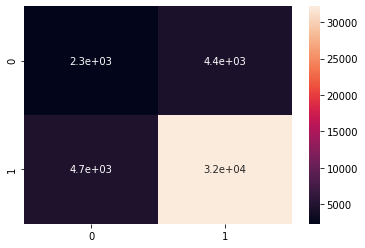

In [36]:







from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
clf_report=classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))


In [37]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.790481212315734


In [38]:
print('Testing Dataset  the model--------------------------------------')


Testing Dataset  the model--------------------------------------


In [39]:
test=pd.read_csv('testing.csv')
test = pd.DataFrame(test)
test.head()
len(test)


50000

In [40]:

test.columns

Index(['Unnamed: 0', 'ID', 'STATE', 'OCCUPATION', 'INCOME_GROUP',
       'CUSTOMER_SINCE', 'LOYALTY_PROGRAM', 'PAST_PURCHASE_Normalised',
       'AGE_Normalised'],
      dtype='object')

In [41]:
test=test.drop(['ID','STATE','Unnamed: 0'], axis = 1)
len(test)

50000

In [42]:


#Predict the response for test dataset
y_pred_test = model.predict(test)
y_pred_test


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [43]:
len(y_pred_test)

50000

In [44]:
len(test)

50000

In [45]:
df_teaser=pd.DataFrame(y_pred_test)

In [46]:
df_teaser.rename(columns = {0:'PURCHASE'}, inplace = True)

In [47]:
df_teaser.value_counts()

PURCHASE
1           41751
0            8249
dtype: int64

In [48]:
df_teaser


,PURCHASE
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,1
49997,1
49998,1


In [49]:
data_not=pd.read_csv('sample_submission.csv')

In [50]:
data_not

,ID,PURCH
0,150001,NaN
1,150002,NaN
2,150003,NaN
3,150004,NaN
4,150005,NaN
...,...,...
49995,199996,NaN
49996,199997,NaN
49997,199998,NaN
49998,199999,NaN


In [51]:
data_not

,ID,PURCH
0,150001,NaN
1,150002,NaN
2,150003,NaN
3,150004,NaN
4,150005,NaN
...,...,...
49995,199996,NaN
49996,199997,NaN
49997,199998,NaN
49998,199999,NaN


In [52]:
data_not=pd.concat([data_not,df_teaser],axis=1)

In [53]:
data_not

,ID,PURCH,PURCHASE
0,150001,NaN,1
1,150002,NaN,1
2,150003,NaN,1
3,150004,NaN,0
4,150005,NaN,1
...,...,...,...
49995,199996,NaN,1
49996,199997,NaN,1
49997,199998,NaN,1
49998,199999,NaN,1


In [54]:
data_not.drop('PURCH',
  axis='columns', inplace=True)


In [55]:

cleanup_nums = {"PURCHASE":     {0: 'No', 1: 'Yes'}}
data_not =data_not.replace(cleanup_nums)

In [56]:
data_not.to_csv("Final_Submission_File.csv")

In [57]:
data_not

,ID,PURCHASE
0,150001,Yes
1,150002,Yes
2,150003,Yes
3,150004,No
4,150005,Yes
...,...,...
49995,199996,Yes
49996,199997,Yes
49997,199998,Yes
49998,199999,Yes


In [62]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
print(test)

       OCCUPATION  INCOME_GROUP  CUSTOMER_SINCE  LOYALTY_PROGRAM  \
0               1             1               3                0   
1               1             2              10                1   
2               3             0               4                1   
3               3             0               3                1   
4               0             1               7                0   
...           ...           ...             ...              ...   
49995           1             1               5                0   
49996           1             2               5                0   
49997           0             2              10                0   
49998           3             0               4                1   
49999           3             0               3                1   

       PAST_PURCHASE_Normalised  AGE_Normalised  
0                      0.128395        0.573770  
1                      0.123494        0.442623  
2                      0.166592  

In [67]:
model=pickle.load(open('model.pkl','rb'))
print(model.predict([test.loc[9900]]))

[0]


In [68]:
print(test.loc[7])

OCCUPATION                  1.000000
INCOME_GROUP                1.000000
CUSTOMER_SINCE              8.000000
LOYALTY_PROGRAM             1.000000
PAST_PURCHASE_Normalised    0.162736
AGE_Normalised              0.655738
Name: 7, dtype: float64
